In [1]:
import pandas as pd

raw_data = pd.read_parquet('../data/raw/yahoo/AAPL_prices.parquet')

In [4]:
raw_data.head()

Price,date,adj_close,close,high,low,open,volume,symbol,source
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2010-01-04,6.418384,7.643214,7.660714,7.585000,7.622500,493729600,AAPL,yahoo
1,2010-01-05,6.429480,7.656429,7.699643,7.616071,7.664286,601904800,AAPL,yahoo
2,2010-01-06,6.327209,7.534643,7.686786,7.526786,7.656429,552160000,AAPL,yahoo
3,2010-01-07,6.315513,7.520714,7.571429,7.466071,7.562500,477131200,AAPL,yahoo
4,2010-01-08,6.357502,7.570714,7.571429,7.466429,7.510714,447610800,AAPL,yahoo


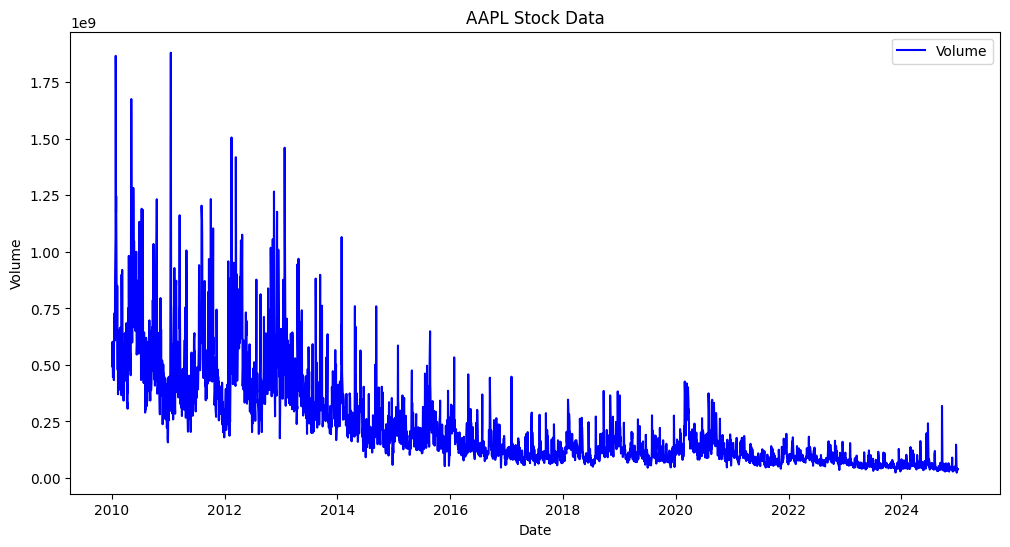

In [6]:
# plot volumes, high and close curves by timestamp

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(raw_data['date'], raw_data['volume'], label='Volume', color='blue')


plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('AAPL Stock Data')
plt.legend()
plt.show()

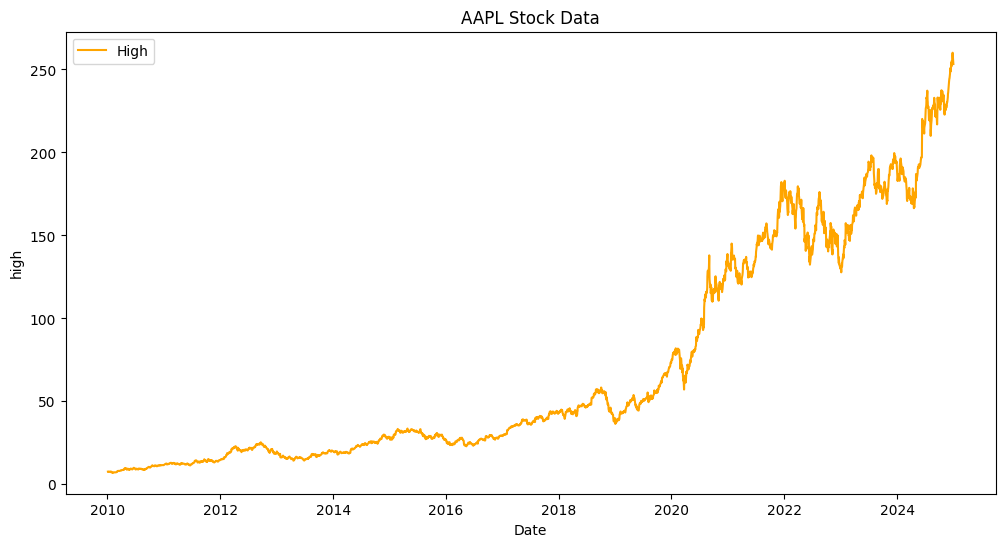

In [8]:
# plot volumes, high and close curves by timestamp

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.plot(raw_data['date'], raw_data['high'], label='High', color='orange')

plt.xlabel('Date')
plt.ylabel('high')
plt.title('AAPL Stock Data')
plt.legend()
plt.show()

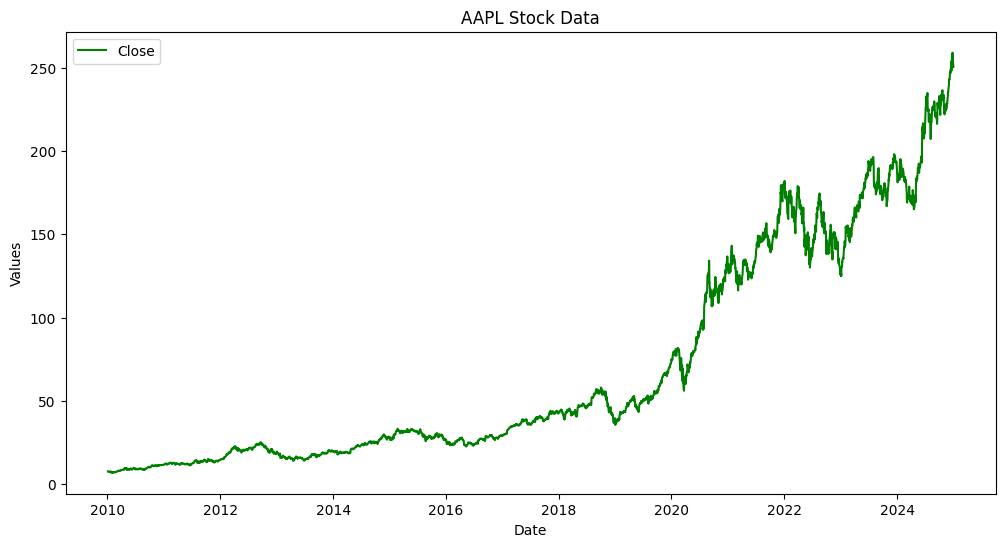

In [9]:
# plot volumes, high and close curves by timestamp

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(raw_data['date'], raw_data['close'], label='Close', color='green')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('AAPL Stock Data')
plt.legend()
plt.show()

### OHLCV - Plotly

In [3]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Candlestick(
        x=raw_data['date'],
        open=raw_data['open'],
        high=raw_data['high'],
        low=raw_data['low'],
        close=raw_data['close'],
        name='AAPL Candlestick'
    )
])

fig.show()


In [7]:
# volume

fig.add_trace(
    go.Bar(
        x=raw_data["date"],
        y=raw_data["volume"],
        name="Volume",
        yaxis="y2"
    )
)

fig.update_layout(
    yaxis2=dict(overlaying="y", side="right", showgrid=False)
)


In [56]:
df_raw = raw_data.dropna()

df_raw.columns = df_raw.columns.get_level_values(0)

df_raw["date"] = pd.to_datetime(df_raw["date"])
df= df_raw.set_index("date")

df

Price,adj_close,close,high,low,open,volume,symbol,source
date,,,,,,,,
2010-01-04,6.418384,7.643214,7.660714,7.585000,7.622500,493729600,AAPL,yahoo
2010-01-05,6.429480,7.656429,7.699643,7.616071,7.664286,601904800,AAPL,yahoo
2010-01-06,6.327209,7.534643,7.686786,7.526786,7.656429,552160000,AAPL,yahoo
2010-01-07,6.315513,7.520714,7.571429,7.466071,7.562500,477131200,AAPL,yahoo
2010-01-08,6.357502,7.570714,7.571429,7.466429,7.510714,447610800,AAPL,yahoo
...,...,...,...,...,...,...,...,...
2024-12-24,257.037506,258.200012,258.209991,255.289993,255.490005,23234700,AAPL,yahoo
2024-12-26,257.853760,259.019989,260.100006,257.630005,258.190002,27237100,AAPL,yahoo
2024-12-27,254.439224,255.589996,258.700012,253.059998,257.829987,42355300,AAPL,yahoo


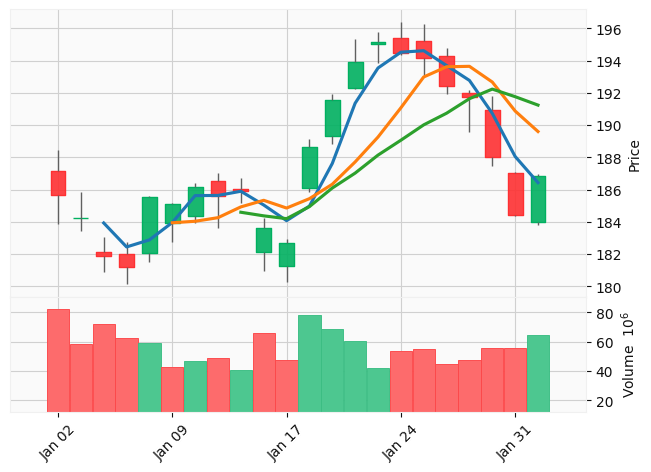

In [57]:
# mlpfinance: matplotlib finance
import mplfinance as mpf

# zoom une période
df_plot = df.loc["2024-01-01":"2024-02-01"]
mpf.plot(
    df_plot, 
    type='candle', 
    volume=True, 
    style='yahoo',
    mav=(3, 6, 9)
    )

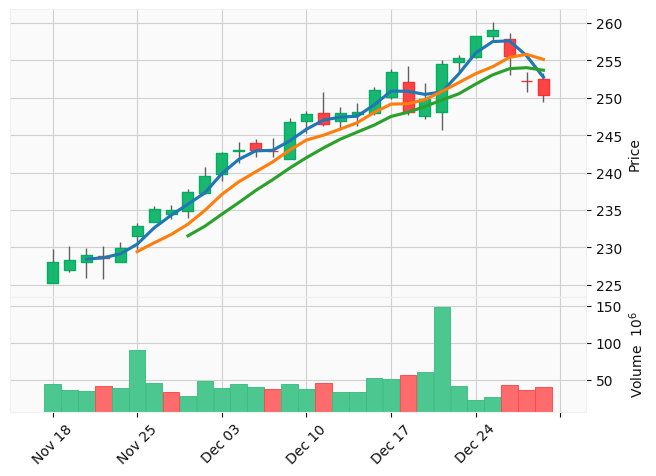

In [66]:
# N dernières périodes

mpf.plot(
    df.tail(30), 
    type='candle', 
    volume=True, 
    style='yahoo',
    mav=(3, 6, 9)
    )

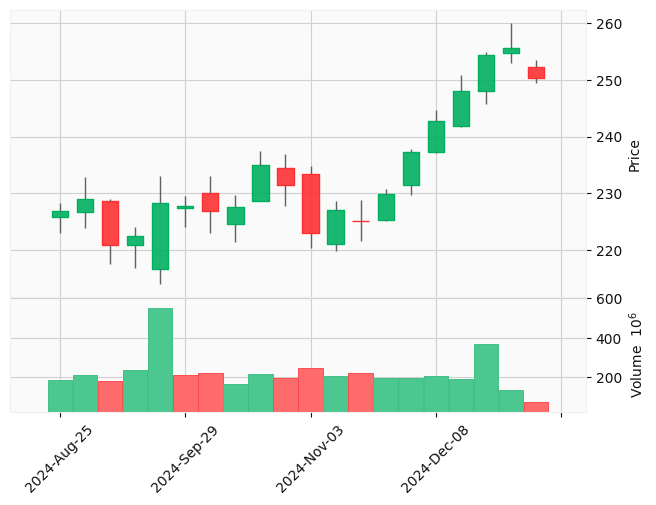

In [69]:
# resample en hebdomadaire

df_weekly = df.resample("W").agg({
    "open": "first",
    "high": "max",
    "low": "min",
    "close": "last",
    "volume": "sum"
})

mpf.plot(df_weekly.tail(20), type="candle", volume=True, style="yahoo")

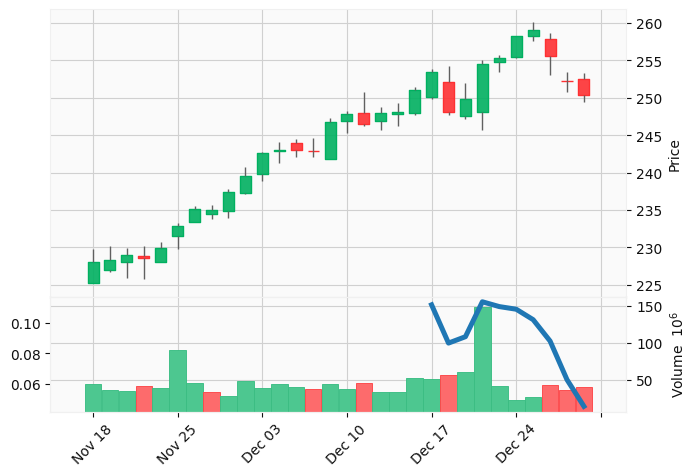

In [72]:
# addplot: pourcentage de variation sur 20 périodes

ap = mpf.make_addplot(df["close"].tail(30).pct_change(20), panel=1)

mpf.plot(
    df.tail(30),
    type="candle",
    volume=True,
    addplot=ap,
    style="yahoo"
)

In [58]:
# bokeh
from bokeh.plotting import figure, show
from bokeh.io import output_notebook


output_notebook()

p = figure(x_axis_type="datetime")

p.segment(df_raw["date"], df_raw["high"], df_raw["date"], df_raw["low"])
p.vbar(df_raw["date"], 12*60*60*1000, df_raw["open"], df_raw["close"])

show(p)


Loading BokehJS ...

In [62]:
# holoviews et hvplot

import hvplot.pandas

df.hvplot.ohlc(
    x="date",
    open="open",
    high="high",
    low="low",
    close="close"
)


:Overlay
   .Segments.I   :Segments   [date,high,date,close]   (adj_close,close,high,low,lbound,ubound)
   .Rectangles.I :Rectangles   [lbound,adj_close,ubound,low]   (adj_close,close,high,low,lbound,ubound)

### Returns

In [82]:
returns = pd.read_parquet('../data/clean/yahoo/returns.parquet')

In [75]:
returns.head()

Price,date,adj_close,close,high,low,open,volume,symbol,source,log_price,log_return
0,2010-01-05,6.429479,7.656429,7.699643,7.616071,7.664286,601904800,AAPL,yahoo,1.860894,0.001727
1,2010-01-06,6.327212,7.534643,7.686786,7.526786,7.656429,552160000,AAPL,yahoo,1.844860,-0.016034
2,2010-01-07,6.315511,7.520714,7.571429,7.466071,7.562500,477131200,AAPL,yahoo,1.843009,-0.001851
3,2010-01-08,6.357501,7.570714,7.571429,7.466429,7.510714,447610800,AAPL,yahoo,1.849635,0.006627
4,2010-01-11,6.301418,7.503929,7.607143,7.444643,7.600000,462229600,AAPL,yahoo,1.840775,-0.008861


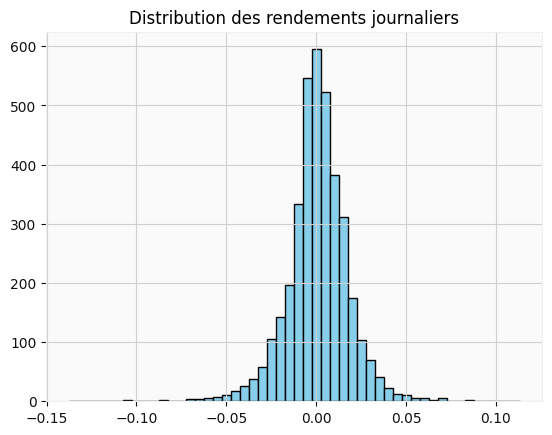

In [84]:
# plot distribution des rendements journaliers

import matplotlib.pyplot as plt


plt.hist(returns["log_return"], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution des rendements journaliers")
plt.show()


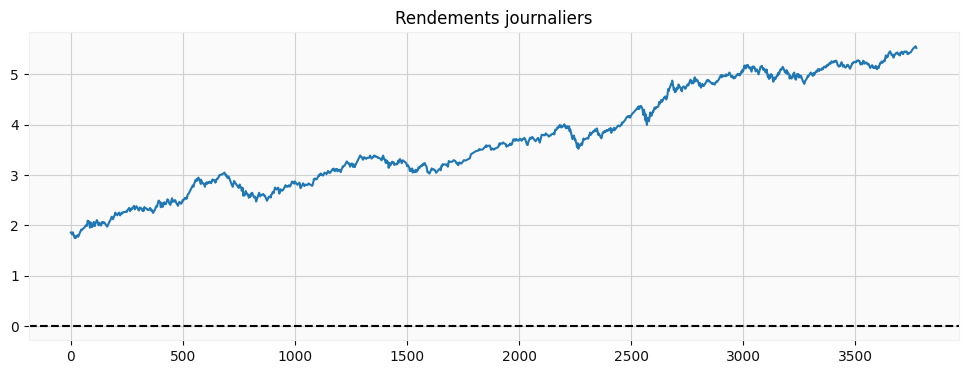

In [87]:
# plot des rendements journaliers dans le temps

returns["log_price"].plot(title="Rendements journaliers", figsize=(12,4))
plt.axhline(0, color='black', linestyle='--')
plt.show()


In [89]:
# statistiques descriptives des rendements

returns["log_return"].mean(), returns["log_return"].std()

(np.float64(0.0009699073496099688), np.float64(0.01755870004043728))

<Axes: title={'center': 'Daily Log Returns'}, xlabel='date'>

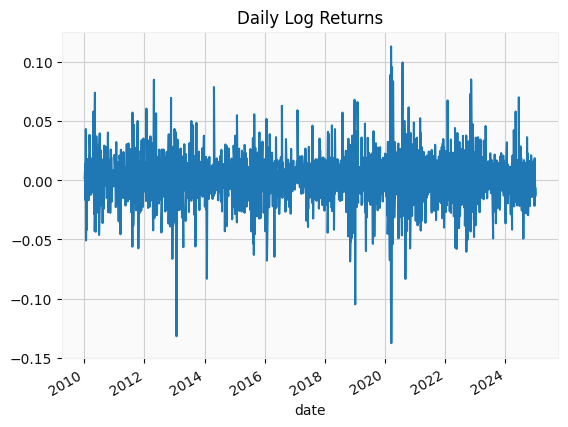

In [90]:
# sanity

returns.set_index("date")["log_return"].plot(title="Daily Log Returns")

### Analysis Results

In [91]:
# stationarity tests
from statsmodels.tsa.stattools import adfuller, kpss

r = returns['log_return']

# ADF test
adf_stat, adf_p, *_ = adfuller(r)
print(f"ADF Statistic: {adf_stat}")

# KPSS test
kpss_stat, kpss_p, *_ = kpss(r, regression='c')
print(f"KPSS Statistic: {kpss_stat}")

# Interpretation

# ADF p < 0.05 → no unit root ✔️

# KPSS p > 0.05 → stationary ✔️
# Returns usually pass both.

ADF Statistic: -20.32584176728179
KPSS Statistic: 0.037773742069288276


C:\Users\Adama COULIBALY\AppData\Local\Temp\ipykernel_756\2795726061.py:11: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




### Autocorrelation Structure (ACF/PACF)


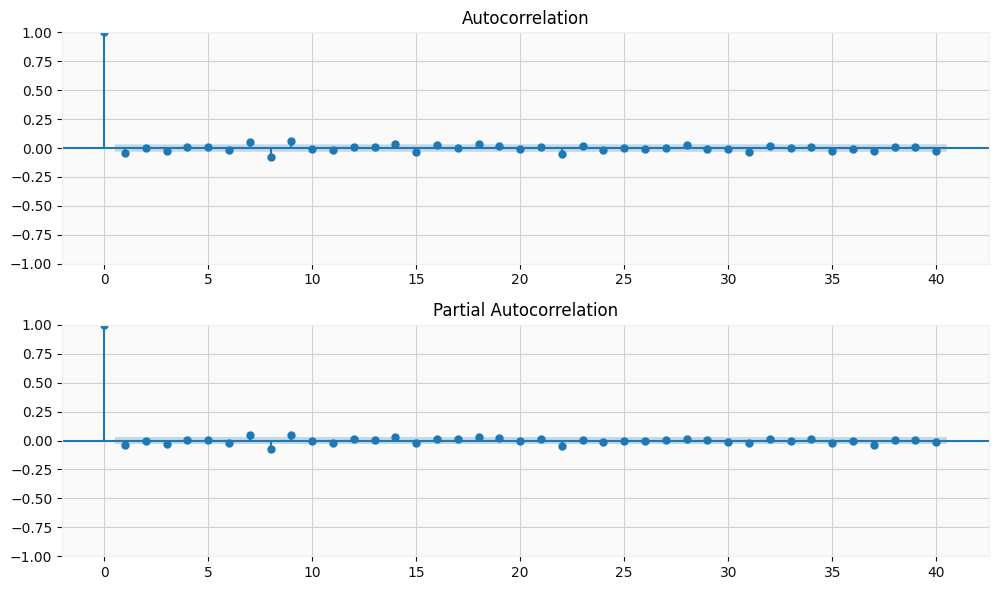

In [92]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(10,6))

plot_acf(r, lags=40, ax=ax[0])
plot_pacf(r, lags=40, ax=ax[1])

plt.tight_layout()
plt.show()

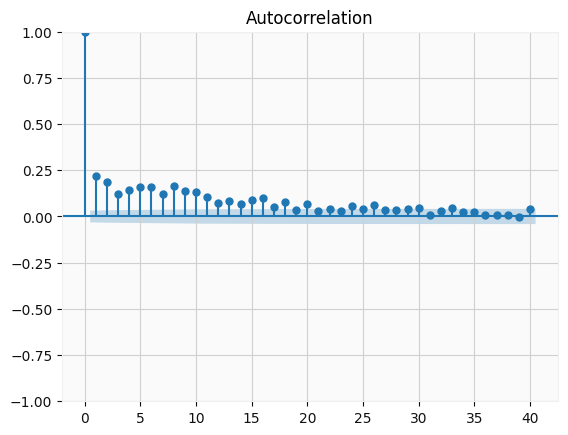

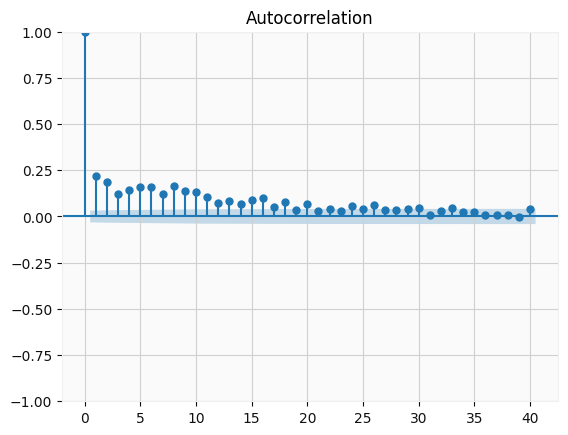

In [93]:
# squared returns
plot_acf(r**2, lags=40)

### ARIMA: AutoRegressive Integrated Moving Average


In [22]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

arima_data = pd.read_parquet("../models/arima_model_selection.parquet")
returns = pd.read_parquet('../data/clean/yahoo/returns.parquet')

In [17]:
arima_data.head()

,p,q,AIC,BIC
0,0,1,-19795.779887,-19777.073009
1,1,0,-19795.774390,-19777.067513
2,1,1,-19793.774699,-19768.832196
3,2,0,-19793.774584,-19768.832082
4,0,2,-19793.774525,-19768.832022


In [24]:
r = returns["log_return"]
results = arima_data.values.tolist()
p, q = results[0][0], results[0][1]

arma = ARIMA(r, order=(p, 0, q)).fit()
arma.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             log_return   No. Observations:                 3773
Model:                 ARIMA(0, 0, 1)   Log Likelihood                9900.890
Date:                Wed, 21 Jan 2026   AIC                         -19795.780
Time:                        13:17:00   BIC                         -19777.073
Sample:                             0   HQIC                        -19789.129
                               - 3773                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.000      3.468      0.001       0.000       0.002
ma.L1         -0.0386      0.011     -3.498      0.000      -0.060      -0.017
sigma2         0.0003   3.96e-06     77.661      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4357.46
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### garch: Generalized Autoregressive Conditional Heteroskedasticity

In [25]:
import pickle

with open('../models/garch_model.pkl', 'rb') as f:
    garch_model = pickle.load(f)

garch_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7200.31
Distribution:                  Normal   AIC:                           14408.6
Method:            Maximum Likelihood   BIC:                           14433.6
                                        No. Observations:                 3773
Date:                Wed, Jan 21 2026   Df Residuals:                     3772
Time:                        14:11:40   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0670  2.718e-02      2.467  1.364e-02 [1.377e-02,  0.120]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1605  4.520e-02      3.552  3.828e-04 [7.195e-02,  0.249]
alpha[1]       0.1015  1.994e-02      5.089  3.600e-07 [6.238e-02,  0.141]
beta[1]        0.8469  2.881e-02     29.395 6.414e-190   [  0.790,  0.903]
==========================================================================

Covariance estimator: robust
"""

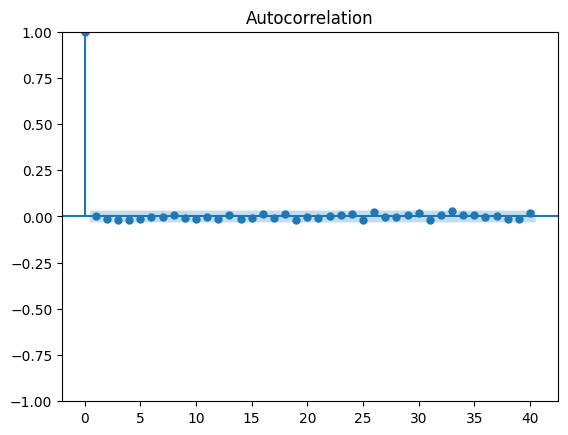

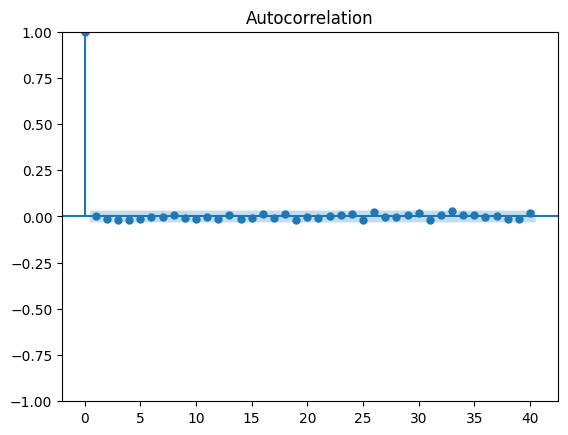

In [26]:
from statsmodels.graphics.tsaplots import plot_acf

std_resid = garch_model.std_resid
plot_acf(std_resid**2, lags=40)